In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix as cmat
import seaborn as sns

In [2]:
#Load the data

In [42]:
df = pd.read_csv('creditcard_train.csv').drop(["Unnamed: 0"], axis=1)

In [79]:
df.shape #30 Features + 1 Target

(234807, 20)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)


IndexError: index -1 is out of bounds for axis 0 with size 0

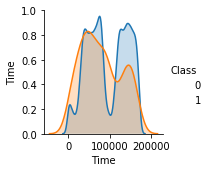

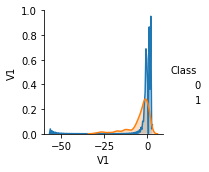

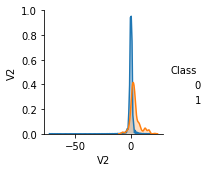

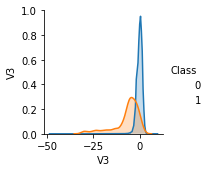

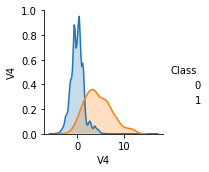

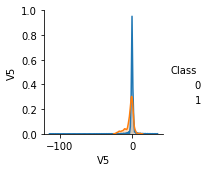

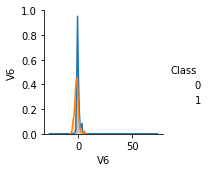

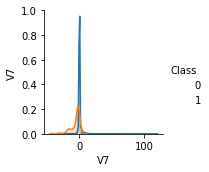

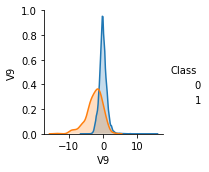

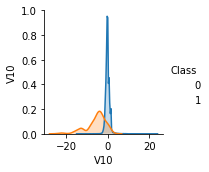

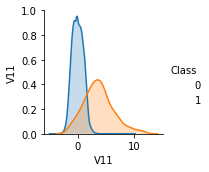

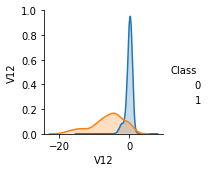

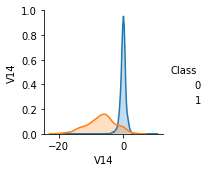

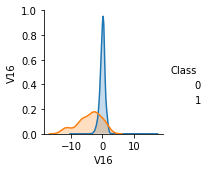

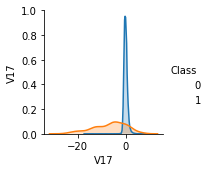

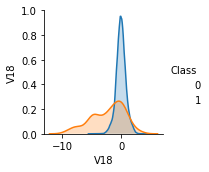

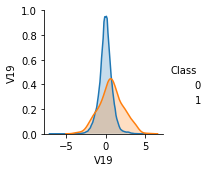

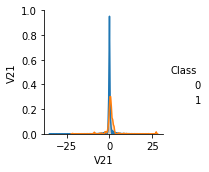

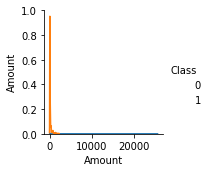

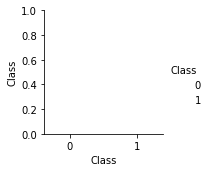

<Figure size 0x0 with 0 Axes>

In [78]:
for i in range(30):
    columns = df.columns[i:i+1]
    sns_plot = sns.pairplot(df, hue="Class", vars=[f for f in columns])


In [45]:
# Removing Features
df = df.drop(['V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0   32299.0  1.226281 -0.009256  0.577310  0.947031 -0.148689  0.691595   
1  121465.0  1.096730 -1.447605 -1.842055  0.916015 -0.302362 -0.273146   
2  138623.0 -3.533513  0.059762 -1.188308  0.172667  1.772095  0.388413   
3   87921.0  2.052184 -0.014594 -1.053694  0.403369 -0.055014 -1.113228   
4  154308.0  1.858639 -0.484918 -0.379265  0.487287 -0.750920 -0.743865   

         V7        V9       V10       V11       V12       V14       V16  \
0 -0.511769  0.530187 -0.010807 -0.088054  0.996729 -0.251821  0.414825   
1  0.384379  0.419916 -0.462037  1.220797  0.751032 -0.823085  0.748737   
2  0.067196 -1.131287 -1.477145 -1.338290  0.516567  1.384300 -0.786178   
3  0.215609  0.441010  0.045208 -0.579259  0.805949  0.151321 -0.194301   
4 -0.366968  1.129436 -0.153468 -0.667427  0.811313 -0.157938  0.249149   

        V17       V18       V19       V21  Amount  Class  
0 -0.890702  0.811196  0.494587  0.065431    1.00      0  
1  0.293450  0.758388 -0.170467  0.214677  463.70      0  
2  0.772245 -1.580955 -1.634293  0.239156   46.11      0  
3 -0.268981 -1.038505  0.069538 -0.275334    2.69      0  
4 -0.712663  0.197107 -0.411544  0.266832   77.08      0

In [46]:
X_train, y_train = df.drop(['Class'], axis=1), df['Class'].replace(1,-1).replace(0,1)

In [47]:
rng = np.random.RandomState(6)

In [48]:
Model = IsolationForest(n_estimators = 100, behaviour='new', max_samples=70000,
                      random_state=rng, contamination=0.015, n_jobs=-1)
Model.fit(X_train)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.015,
                max_features=1.0, max_samples=70000, n_estimators=100,
                n_jobs=-1,
                random_state=<mtrand.RandomState object at 0x7f07d7ddfb40>,
                verbose=0, warm_start=False)

In [49]:
X_test = pd.read_csv("creditcard_test.csv").drop(['Unnamed: 0', 'V8', 'V13', 'V15', 'V20', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)

In [50]:
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
0   35481.0  0.003943  0.228557  0.710912  0.109068  1.588486  4.504721   
1   79129.0  0.944726 -1.174213  0.240602 -2.173820 -0.435196  1.278827   
2  118796.0  1.904055 -0.226985 -1.657041  0.547385 -0.200657 -1.338980   
3  167363.0  0.374790 -3.872050 -4.971781 -1.176673  1.682119  2.933856   
4  138937.0 -0.217237  1.214642 -0.867900 -0.534643  0.705577 -0.789080   

         V7        V9       V10       V11       V12       V14       V16  \
0 -1.149161  0.237074 -0.357308 -0.514497  0.150161 -0.111656  0.151661   
1 -0.865236  2.516060 -1.854753  0.104111  1.053097 -0.006921 -1.949792   
2  0.100495  1.254921 -0.817500 -0.741613 -0.509749 -1.122195  0.054721   
3  1.166743 -1.332571  0.498064  0.072142 -0.602543  0.854530  0.111418   
4  0.598961 -0.181912 -1.056287 -1.050413 -0.090738 -0.686628  0.522578   

        V17       V18       V19       V21   Amount  Class  
0 -0.414161  0.499242  0.793114  0.614185    24.99      0  
1  1.011528 -1.306655 -0.363737  0.287400   102.91      0  
2  1.175713  0.210031  0.111688 -0.227548    69.32      0  
3  0.496478 -1.690606  0.308642  1.074730  1000.00      0  
4  0.464592 -0.089967 -0.154184 -0.307740     8.99      0

In [51]:
y_test = X_test['Class'].replace(1,-1).replace(0,1)
X_test = X_test.drop("Class", axis=1)


In [52]:
y_pred = Model.predict(X_test)

In [53]:
cm = cmat(y_test, y_pred, labels=[1, -1])

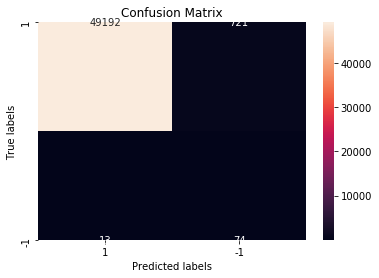

In [54]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '-1']); ax.yaxis.set_ticklabels(['1', '-1']);

In [76]:
cm

array([[49192,   721],
       [   13,    74]])

In [56]:
roc_auc_score(y_test, Model.score_samples(X_test))

0.9762685924082616

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, Model.score_samples(X_test))

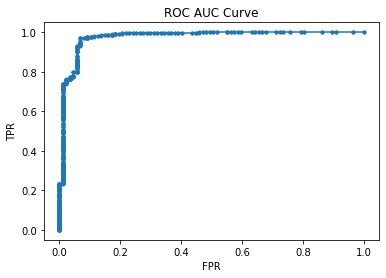

In [77]:
plt.plot(fpr, tpr, marker='.')
plt.title("ROC AUC Curve");
plt.xlabel("FPR");
plt.ylabel("TPR");

# Got AUC of 97.6%